In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


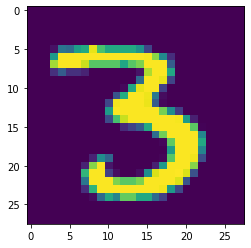

In [16]:
from matplotlib import pyplot as plt
plt.imshow(x_train[12], interpolation='nearest')
plt.show()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
batch_size = 128
num_classes = 10
epochs = 10

In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 18s 36ms/step - loss: 2.3048 - accuracy: 0.1041 - val_loss: 2.2887 - val_accuracy: 0.1307
Epoch 2/10
469/469 [==============================] - 16s 35ms/step - loss: 2.2922 - accuracy: 0.1214 - val_loss: 2.2756 - val_accuracy: 0.1855
Epoch 3/10
469/469 [==============================] - 18s 37ms/step - loss: 2.2821 - accuracy: 0.1378 - val_loss: 2.2621 - val_accuracy: 0.2749
Epoch 4/10
469/469 [==============================] - 17s 35ms/step - loss: 2.2691 - accuracy: 0.1602 - val_loss: 2.2478 - val_accuracy: 0.3588
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 2.2566 - accuracy: 0.1810 - val_loss: 2.2322 - val_accuracy: 0.4112
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 2.2437 - accuracy: 0.2004 - val_loss: 2.2153 - val_accuracy: 0.4526
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 2.2305 - accuracy: 0.2169 - val_loss: 2.1969 - val_accuracy:

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.129155158996582
Test accuracy: 0.5788000226020813
